# **Airbnb Price Prediction**

Link to Colab Notebook: https://colab.research.google.com/drive/1xK8zeAg6PG8wwviTkpvTIyqxTkqlMEVS#scrollTo=6anYxX89tfzx

**Contributors:** Aastha Surana, Divyesh Sai Annavarapu, Jaynender Singh, Pranaya Bindu Buyya

## **Introduction**

### **Problem Statement**

The sharing economy has transformed travel, with Airbnb leading the way in accommodations. Pricing is pivotal: hosts aim for profitability while attracting guests, and guests seek value. This project focuses on developing a machine learning model to predict the log-transformed prices of Airbnb listings using structured data, helping hosts and Airbnb make informed, data-driven pricing decisions.

### **Motivation**

The insights from this project can have significant practical implications for Airbnb's ecosystem.

* **For Hosts**: Help hosts set competitive and profitable rates, improving occupancy and revenue while reducing pricing uncertainties.

* **For Guests**: Enhance pricing transparency, enabling informed booking decisions and fostering trust in the platform.

* **For Airbnb**: Optimize pricing to boost bookings, improve listing competitiveness, and enhance user satisfaction across the ecosystem.

* **Broader Impact**: Demonstrate the power of machine learning to solve real-world business challenges and drive data-driven decision-making.

## **Executive Summary**
This report explores the factors influencing Airbnb listing prices by analyzing extensive data on property attributes, host characteristics, and customer feedback. It leverages advanced data cleaning techniques and machine learning models to draw actionable insights.

**Objectives**
1. **Identify Key Price Determinants:** Evaluate which property attributes (e.g., location, size, amenities) and host features significantly impact listing prices.
2. **Model Robust Price Predictions:** Build predictive models to estimate prices with high accuracy and evaluate their performance using industry-standard metrics.
3. **Segment and Analyze Listings:** Uncover trends and patterns across different property types, neighborhoods, and pricing tiers to provide a strategic perspective.

**Findings**
1. **Best Model:** Gradient Boosting emerged as the most accurate predictor, with an RMSE of 0.34 and R-square of 73%, outperforming baseline models.
2. **Alternative Models:** Simpler models like Linear Regression, Ridge Regression, and SVR underperformed compared to Gradient Boosting, which proved to be the most effective in capturing complex data relationships.
3. **Feature Importance:** Top predictors include room type, number of bathrooms, location, number of bedrooms, and review scores.

**Recommendations**
1. **Optimize Listing Descriptions:** Hosts should emphasize high-impact features like location and private room types attract higher-paying customers.
2. **Focus on Key Segments:** Target marketing efforts on properties in premium locations to maximize revenue potential.
3. **Continuous Data Monitoring:** Regularly update and monitor listing data to refine models and adapt to market trends effectively.

## **Dataset**

### **Data Source**

We are utilizing a dataset from Kaggle that focuses on Airbnb listings, containing diverse features such as property details, host information, reviews, and pricing. The primary objective of this project is to predict the price of Airbnb listings based on these attributes.

Since Airbnb does not release official data on its marketplace listings, an independent organization, Inside Airbnb, scrapes and compiles publicly available information from the Airbnb website. For this project, we are using a dataset scraped in July 2016, which includes listings from six major U.S. cities: New York, Washington DC, San Francisco, Los Angeles, Chicago, and Boston.


Link to Inside Airbnb: https://insideairbnb.com/get-the-data/

Link to Kaggle: https://www.kaggle.com/datasets/stevezhenghp/airbnb-price-prediction

### **Dataset Description**
This dataset contains 74,111 entries of Airbnb listings, with a total of 29 features. It includes detailed information about each listing, such as property details, host attributes, reviews, and location data. Below is an overview of the key features:
Total Entries: 74,111
Total Features: 29
Memory Usage: ~15.9 MB

### **Data Dictionary**

| **Feature**              | **Type**         | **Description**                                                                 |
|--------------------------|------------------|---------------------------------------------------------------------------------|
| `id`                     | Numeric          | Unique identifier for each Airbnb listing                                      |
| `property_type`          | Categorical      | Type of property (e.g., Apartment, House, Condo)                               |
| `room_type`              | Categorical      | Type of room offered (e.g., Entire home/apt, Private room)                    |
| `amenities`              | Text             | List of amenities provided (e.g., TV, Kitchen)  |
| `accommodates`           | Numeric          | Number of people the rental can accommodate                                   |
| `bathrooms`              | Numeric          | Number of bathrooms (including full and half baths)                            |
| `bed_type`               | Categorical      | Type of bed provided (e.g., Real Bed, Futon)                                   |
| `cancellation_policy`    | Categorical      | Host's cancellation policy (e.g., Flexible, Moderate, Strict)                  |
| `cleaning_fee`           | Boolean          | Indicates if a cleaning fee is charged to the customer or not(`True`/`False`)                        |
| `city`                   | Categorical      | City where the listing is located (e.g., Boston, NYC, LA)                      |
| `description`            | Text             | Textual description of the property            |
| `first_review`           | Date             | Date of the first guest review                                                 |
| `host_has_profile_pic`   | Boolean          | Indicates if the host has a profile picture (`True`/`False`)                   |
| `host_identity_verified` | Boolean          | Indicates if the host's identity is verified (`True`/`False`)                  |
| `host_response_rate`     | Numeric          | Host's response rate to inquiries (percentage)                                 |
| `host_since`             | Date             | Date when the host registered on Airbnb                                        |
| `instant_bookable`       | Boolean          | Indicates if the property is available for instant booking (`True`/`False`)   |
| `last_review`            | Date             | Date of the most recent review                                                 |
| `latitude`               | Numeric          | Geographic latitude of the listing                                             |
| `longitude`              | Numeric          | Geographic longitude of the listing                                            |
| `name`                   | Text             | Name/title of the Airbnb listing                |
| `neighbourhood`          | Categorical      | Informal neighborhood name (e.g., Downtown, Brooklyn Heights)                  |
| `number_of_reviews`      | Numeric          | Total number of reviews received                                               |
| `review_scores_rating`   | Numeric          | Average review rating (0–100)                                                  |
| `thumbnail_url`          | Text (URL)       | URL of the property’s primary photo              |
| `zipcode`                | Numeric          | Zipcode of the listing's location |
| `bedrooms`               | Numeric          | Number of bedrooms in the property                                             |
| `beds`                   | Numeric          | Number of beds available in the property                                       |



**Target Variable**: log_price

The target variable, which represents the price of the Airbnb listing. This is the outcome variable we aim to predict based on the features.

Since log_price is a continuous numeric value, this problem is categorized as a regression problem. The goal of the model is to learn the relationship between the features and the target variable to accurately predict the log-transformed price of the listings.

In [ ]:
!pip install scikit-optimize

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import textwrap

In [ ]:
# Load the dataset
file_name = 'https://drive.google.com/uc?export=download&id=1p9AIIGSHNY_PYHvytykJ8wPL1ENJ1S8j'
data = pd.read_csv(file_name)

# Display basic information
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bedrooms                74020 non-null  float64
 7   beds                    73980 non-null  float64
 8   bathrooms               73911 non-null  float64
 9   bed_type                74111 non-null  object 
 10  cancellation_policy     74111 non-null  object 
 11  cleaning_fee            74111 non-null  bool   
 12  city                    74111 non-null  object 
 13  description             74111 non-null  object 
 14  first_review            58247 non-null

* Missing values are minimal for key features like bedrooms, beds, and bathrooms (less than 1%)
* Features such as host_response_rate, first_review, and review_scores_rating have significant missing values (20-25%), which may require imputation or exclusion based on the analysis
* All numeric features are stored as int64 or float64, making them ready for statistical analysis or modeling

## **Data Cleaning**

Dropping unnecessary columns like id, description, and thumbnail_url as they do not provide meaningful or predictive information for the target variable.

In [ ]:
columns_to_drop = ['id', 'description','thumbnail_url']
data = data.drop(columns=columns_to_drop)

Identifying which columns have missing values.

In [ ]:
# Handle missing values
missing_values = data.isnull().sum()
print(f"Missing Values:\n{missing_values}")

Missing Values:
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bedrooms                     91
beds                        131
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
zipcode                     966
dtype: int64


Checking 'property_type' and 'room_type' columns that have missing 'bedrooms'

In [ ]:
# Filter rows where 'bedrooms' is missing
missing_bedrooms = data[data['bedrooms'].isnull()]

# Dropping dupliactes from 'property_type' and 'room_type' columns
result = missing_bedrooms[['property_type', 'room_type','bedrooms']].drop_duplicates()
print(result)

      property_type        room_type  bedrooms
200       Apartment  Entire home/apt       NaN
10513          Loft  Entire home/apt       NaN
11584         Other     Private room       NaN
11766     Apartment     Private room       NaN
24831         House  Entire home/apt       NaN
25806         House     Private room       NaN
33017         Villa     Private room       NaN
35976      Bungalow  Entire home/apt       NaN
39287   Condominium     Private room       NaN


Replacing null values in 'bedrooms' by median value as per the 'property_type'

In [ ]:
# Replace null values in 'bedrooms' by the median of the same 'property_type'
data['bedrooms'] = data.groupby('property_type')['bedrooms'].transform(
    lambda x: x.fillna(x.median())
)

Replacing null values in 'beds' by assigning median value as per the 'bedrooms'

In [ ]:
# Replace null values in 'beds' by the median of the same 'bedrooms'
data['beds'] = data.groupby('bedrooms')['beds'].transform(
    lambda x: x.fillna(x.median())
)

Replacing null values in 'bathrooms' by median value as per the 'bedrooms' and 'apartment_type'

In [ ]:
# Replace null values in 'bathrooms' by the median after grouping by 'apartment_type' and 'bedrooms'
data['bathrooms'] = data.groupby(['property_type', 'bedrooms'])['bathrooms'].transform(
    lambda x: x.fillna(x.median())
)

Assuming that each property has atleast 1 bathroom, assigning the 'bathrooms' value as 1 where value is missing

In [ ]:
data.loc[data['bathrooms'].isnull(), 'bathrooms'] = 1

Understanding the relationship between missing values in 'first_review' and 'review_scores_rating' columns

In [ ]:
missing_relationship = data[['first_review', 'review_scores_rating']].isnull().sum()
print("Missing values in 'first_review' and 'review_scores_rating':\n", missing_relationship)

Missing values in 'first_review' and 'review_scores_rating':
 first_review            15864
review_scores_rating    16722
dtype: int64


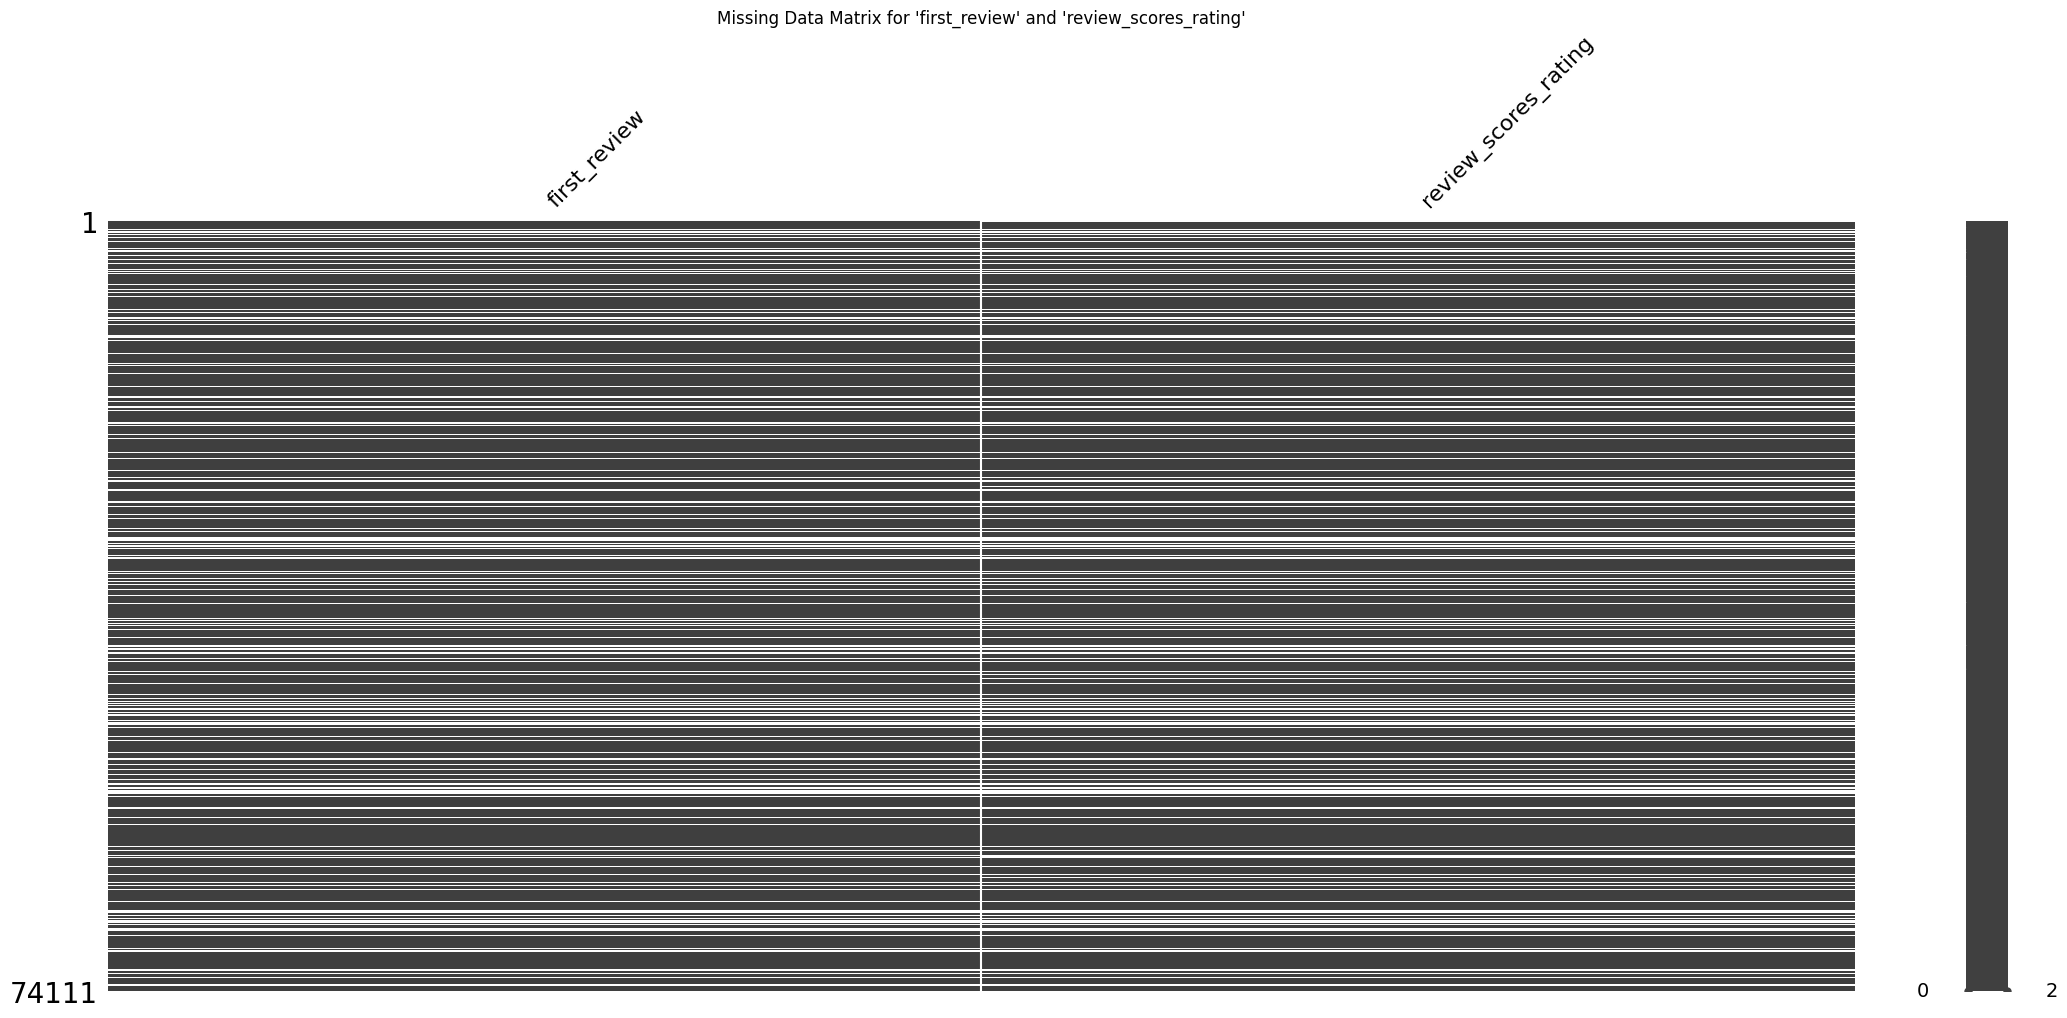

In [ ]:
# Subset the dataset to include only the relevant columns
subset = data[['first_review', 'review_scores_rating']]

# Generate a matrix plot
msno.matrix(subset)
plt.title("Missing Data Matrix for 'first_review' and 'review_scores_rating'")
plt.show()

It was found that wherever 'first_review' has missing values, 'review_scores_rating' also has missing values. Hence, dropping null values in 'first_review' as these null values will affect our model.

In [ ]:
data = data.dropna(subset=['first_review'])

Checking if 'review_scores_rating' has a correlation with any other column that can help us handle the null values in 'review_scores_rating' column.

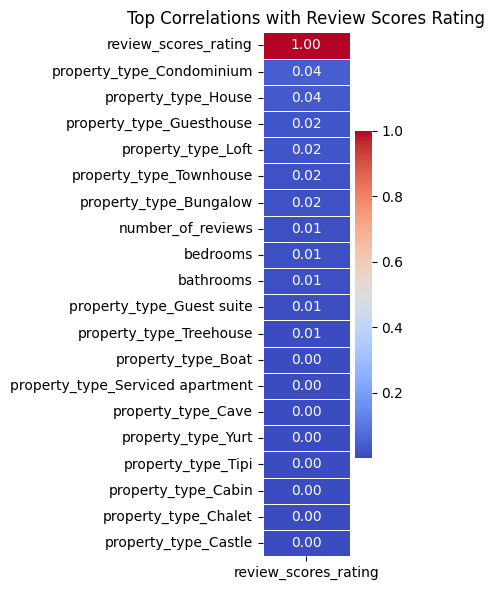

In [ ]:
# Select a smaller set of columns likely to influence 'review_scores_rating'
selected_columns = ['number_of_reviews', 'bedrooms', 'bathrooms', 'property_type', 'room_type']

# Create a smaller DataFrame with only these columns and the target column
data_subset = data[selected_columns + ['review_scores_rating']]

# One-hot encode the categorical columns
categorical_columns = data_subset.select_dtypes(include=['object', 'category']).columns
data_encoded = pd.get_dummies(data_subset, columns=categorical_columns, drop_first=True)

# Compute the correlation matrix
correlation_matrix = data_encoded.corr()

# Sort and plot top correlations with 'review_scores_rating'
corr_review_scores = correlation_matrix[['review_scores_rating']].dropna()
corr_review_scores = corr_review_scores.sort_values(by='review_scores_rating', ascending=False).head(20)

plt.figure(figsize=(4, 6))
sns.heatmap(
    corr_review_scores,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5,
    cbar=True
)
plt.title("Top Correlations with Review Scores Rating")
plt.xticks()
plt.tight_layout()
plt.show()

It is observed that no other column has a strong correlation with the 'review_scores_rating' column. Therefore, we will impute the missing values in 'review_scores_rating' using the median.

In [ ]:
# Replace null values in 'review_scores_rating' with its median
data['review_scores_rating'] = data['review_scores_rating'].fillna(data['review_scores_rating'].median())

Replacing null values in 'host_since' with the corresponding values from 'first_review'.

In [ ]:
# Replace null values in 'host_since' with the corresponding values from 'first_review'
data['host_since'] = data['host_since'].fillna(data['first_review'])

Replacing missing 'host_has_profile_pic' with the mode of the column.

In [ ]:
# Replace missing 'host_has_profile_pic' with the mode
mode_value = data['host_has_profile_pic'].mode()[0]
data['host_has_profile_pic'] = data['host_has_profile_pic'].fillna(mode_value)

Replacing missing values in 'host_identity_verified' according to the 'host_has_profile_pic'. If the host has profile pic then it is likely that their identity is verified.

In [ ]:
# Replace missing 'host_identity_verified' based on 'host_has_profile_pic'
def impute_identity_verified(row):
    if pd.isnull(row['host_identity_verified']):
        if row['host_has_profile_pic'] == 't':
            return 't'  # Likely to be verified if they have a profile picture
        else:
            return 'f'  # Likely not verified if they don't have a profile picture`
    return row['host_identity_verified']  # Keep existing value

data['host_identity_verified'] = data.apply(impute_identity_verified, axis=1)

Handling null values in 'host_response_rate' by assigning median value according to the 'host_identity_verified'.

In [ ]:
# Check if 'host_response_rate' contains strings or percentages
if data['host_response_rate'].dtype == 'object':
    # Remove '%' sign and convert to numeric
    data['host_response_rate'] = data['host_response_rate'].str.rstrip('%').astype(float)

# Group by 'host_identity_verified' and fill missing 'host_response_rate' with the group's median
data['host_response_rate'] = data.groupby('host_identity_verified')['host_response_rate'].transform(
    lambda x: x.fillna(x.median())
)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58247 entries, 0 to 74110
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log_price               58247 non-null  float64
 1   property_type           58247 non-null  object 
 2   room_type               58247 non-null  object 
 3   amenities               58247 non-null  object 
 4   accommodates            58247 non-null  int64  
 5   bedrooms                58247 non-null  float64
 6   beds                    58247 non-null  float64
 7   bathrooms               58247 non-null  float64
 8   bed_type                58247 non-null  object 
 9   cancellation_policy     58247 non-null  object 
 10  cleaning_fee            58247 non-null  bool   
 11  city                    58247 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    58247 non-null  object 
 14  host_identity_verified  58247 non-null  obj

Keeping null values in 'neighbourhood' and 'zipcode' columns for EDA. These columns will be dropped later to fit the model.

In [ ]:
data.head()

,log_price,property_type,room_type,amenities,accommodates,bedrooms,beds,bathrooms,bed_type,cancellation_policy,...,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode
0,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,1.0,1.0,Real Bed,strict,...,26/03/12,f,18/07/16,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,11201
1,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,3.0,3.0,1.0,Real Bed,strict,...,19/06/17,t,23/09/17,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,10019
2,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,3.0,1.0,Real Bed,moderate,...,25/10/16,t,14/09/17,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,10027
4,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,0.0,1.0,1.0,Real Bed,moderate,...,01/03/15,t,22/01/17,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,20009
5,4.442651,Apartment,Private room,"{TV,""Wireless Internet"",Heating,""Smoke detecto...",2,1.0,1.0,1.0,Real Bed,strict,...,07/06/17,t,05/09/17,37.753164,-122.429526,Comfort Suite San Francisco,Noe Valley,3,100.0,94131


In [ ]:
data.describe().round(2)

,log_price,accommodates,bedrooms,beds,bathrooms,host_response_rate,latitude,longitude,number_of_reviews,review_scores_rating
count,58247.00,58247.00,58247.00,58247.00,58247.00,58247.00,58247.00,58247.00,58247.00,58247.00
mean,4.75,3.21,1.26,1.74,1.23,96.21,38.49,-92.31,26.58,94.10
std,0.67,2.14,0.84,1.27,0.56,12.51,3.08,21.67,40.86,7.78
min,0.00,1.00,0.00,0.00,0.00,0.00,33.34,-122.51,1.00,20.00
25%,4.30,2.00,1.00,1.00,1.00,100.00,34.13,-118.34,3.00,92.00
50%,4.70,2.00,1.00,1.00,1.00,100.00,40.67,-76.99,10.00,96.00
75%,5.16,4.00,1.00,2.00,1.00,100.00,40.75,-73.95,32.00,100.00
max,7.60,16.00,10.00,18.00,8.00,100.00,42.39,-71.00,605.00,100.00


## **Exploratory Data Analysis**

### **Histogram Matrix**

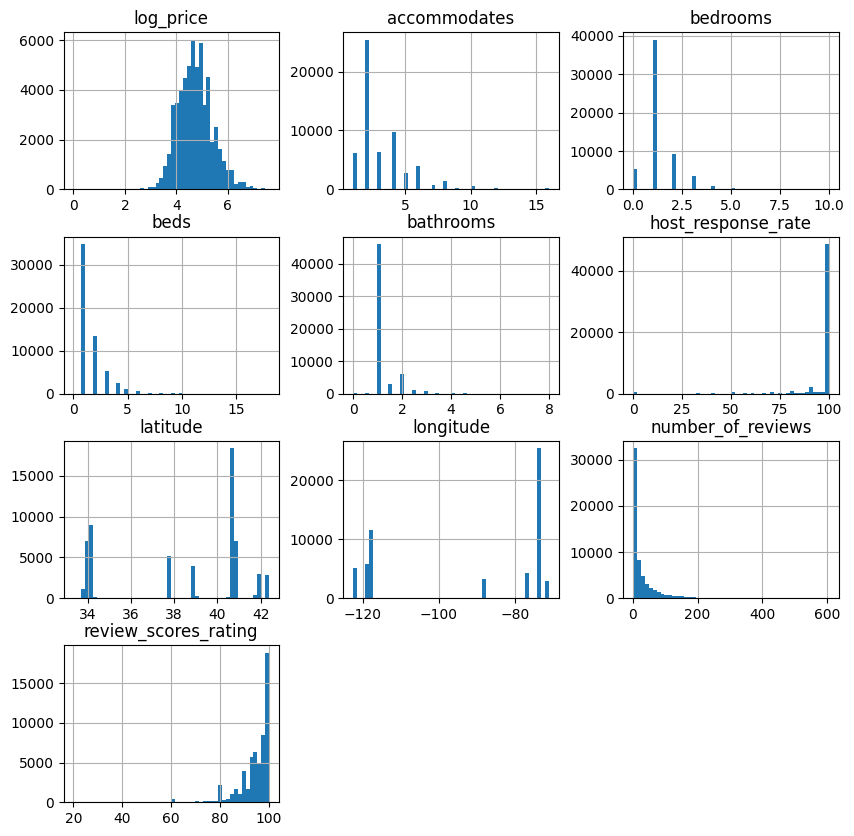

In [ ]:
data.hist(bins=50, figsize=(10, 10))
plt.show()

Based on the above histograms:

1. **log_price Distribution:** The log_price column shows a roughly normal distribution, indicating a relatively even spread of property prices (in log scale) with most values clustering around the center.
2. **beds, bedrooms, and bathrooms:** These variables are heavily skewed to the right, with the majority of listings having a small number of beds, bedrooms, and bathrooms. This is expected for properties catering to smaller groups.
3. **number_of_reviews:** The distribution is highly right-skewed, with most properties having very few reviews, but a few outliers have a large number of reviews.
4. **Geographical Variables (latitude and longitude):** These show distinct clusters, likely corresponding to major cities or neighborhoods covered in the dataset.
5. **review_scores_rating:** The distribution is concentrated towards higher ratings, suggesting that most properties are well-reviewed.
6. **accommodates:** The chart shows that most properties accommodate a small number of guests, with a steep drop-off for larger capacities.

### **Heatmap**

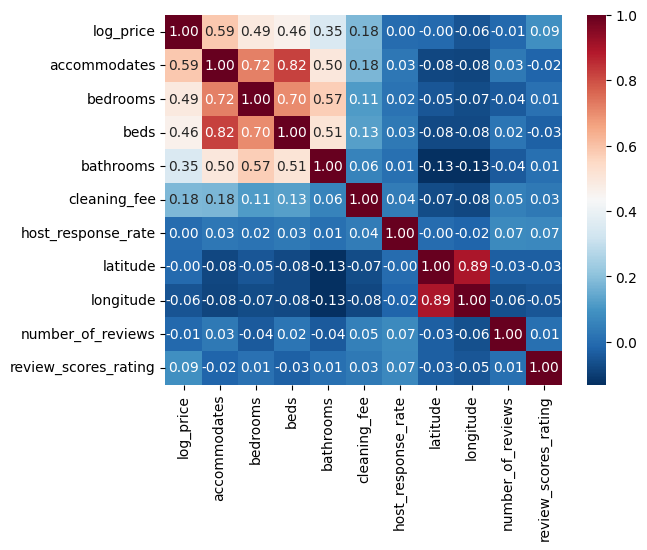

In [ ]:
corr_matrix = data.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdBu_r');

### **Pairplots / scatter-matrices**

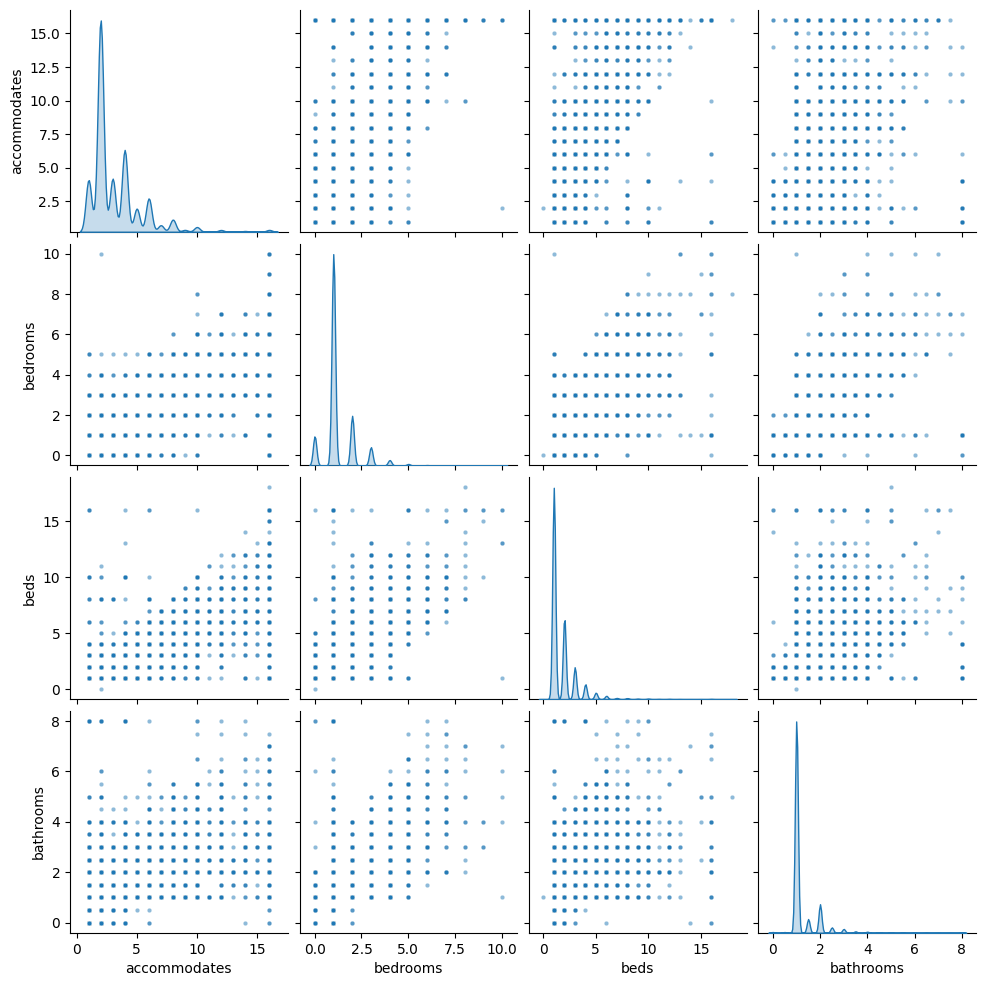

In [ ]:
attributes = ["accommodates", "bedrooms", "beds", "bathrooms"]
sns.pairplot(data[attributes], diag_kind="kde", plot_kws={'s': 10, 'alpha': 0.5})

### **Log price across cities**

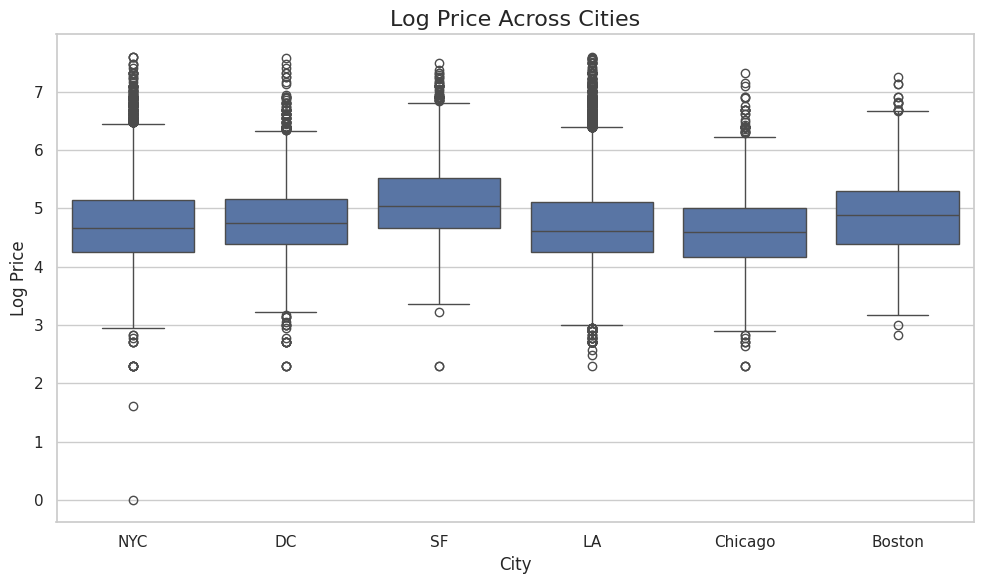

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='city', y='log_price')
plt.title('Log Price Across Cities', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Log Price', fontsize=12)

plt.tight_layout()
plt.show()

* **City-Specific Pricing Trends:** The median log prices vary across cities, indicating that the city itself is a strong predictor of property prices. San Francisco and New York City exhibit higher median prices compared to other cities
* **Price Variability:** San Francisco and New York City also show a wider range of prices, with significant variability and numerous outliers, reflecting a diverse market with high-end and low-end properties
* **Relatively Stable Markets:** Cities like Boston, Chicago, and Washington DC display narrower interquartile ranges, suggesting more consistent pricing patterns and potentially less market volatility

### **Log Price Across Property Type**

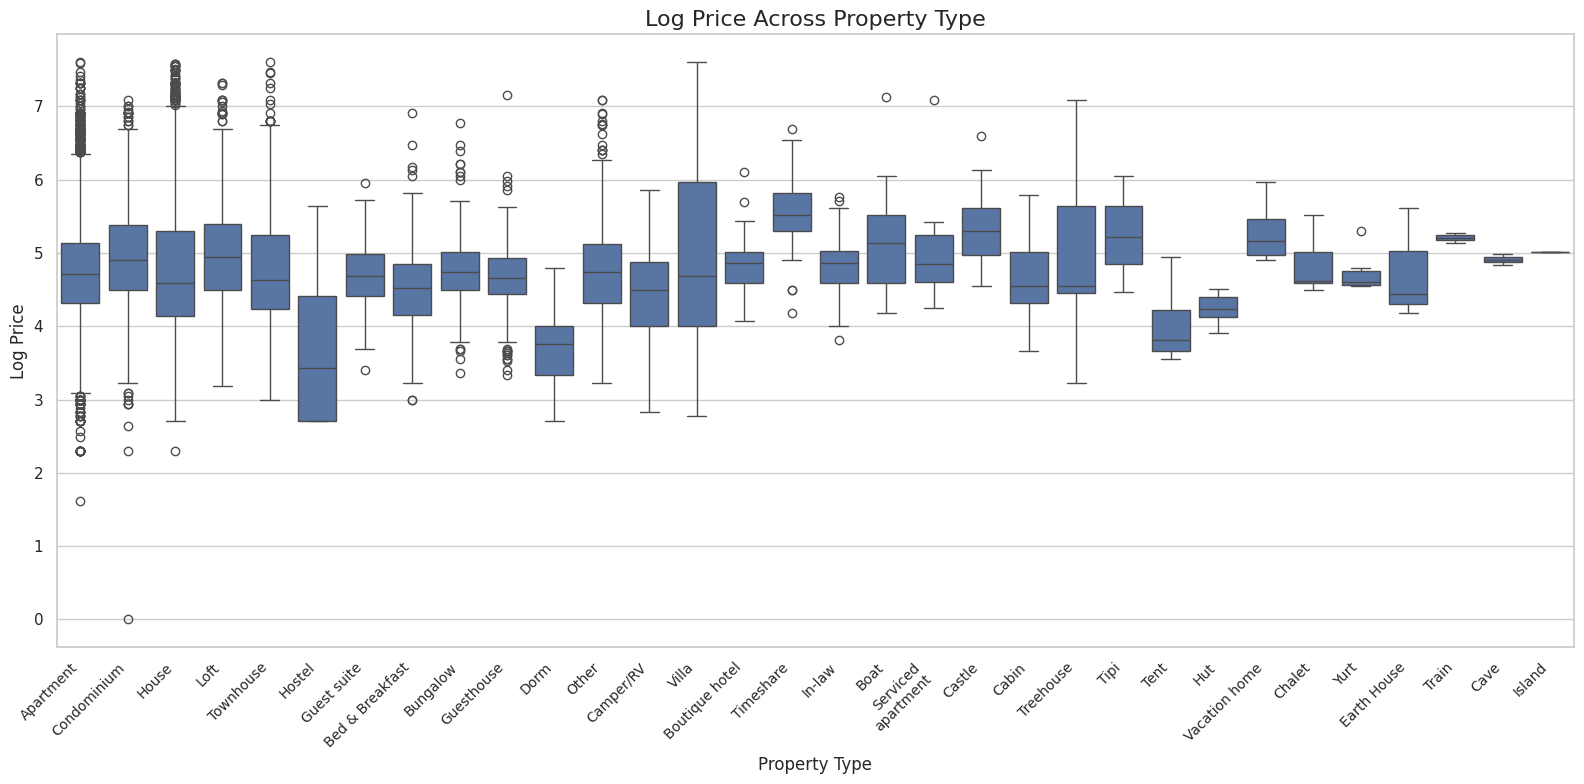

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 8))
sns.boxplot(data=data, x='property_type', y='log_price')
xticks_labels = [textwrap.fill(label, 15) for label in data['property_type'].unique()]
plt.xticks(ticks=range(len(xticks_labels)), labels=xticks_labels, rotation=45, ha='right', fontsize=10)

plt.title('Log Price Across Property Type', fontsize=16)
plt.xlabel('Property Type', fontsize=12)
plt.ylabel('Log Price', fontsize=12)

plt.tight_layout()
plt.show()

* **Property Type Variation:** The median log price varies significantly across property types, indicating that property type is a strong predictor of price in this dataset
* **Budget-Friendly Options:** Property types like "Hostel," "Guest Suite," and "Dorm" have lower median log prices and narrower interquartile ranges, pointing to consistent affordability and less variability in these categories
* **Common Residential Types:** Categories such as "Apartment," "House," and "Condominium" exhibit moderate median log prices with relatively tight distributions, indicating they are standard options with predictable pricing patterns, making them stable predictors.=
* **Diverse Price Ranges:** Some property types, such as "Guesthouse" and "Treehouse," span a wide range of prices, indicating that these categories capture a broad spectrum of customer preferences and pricing strategies

### **Log price across Room Types**

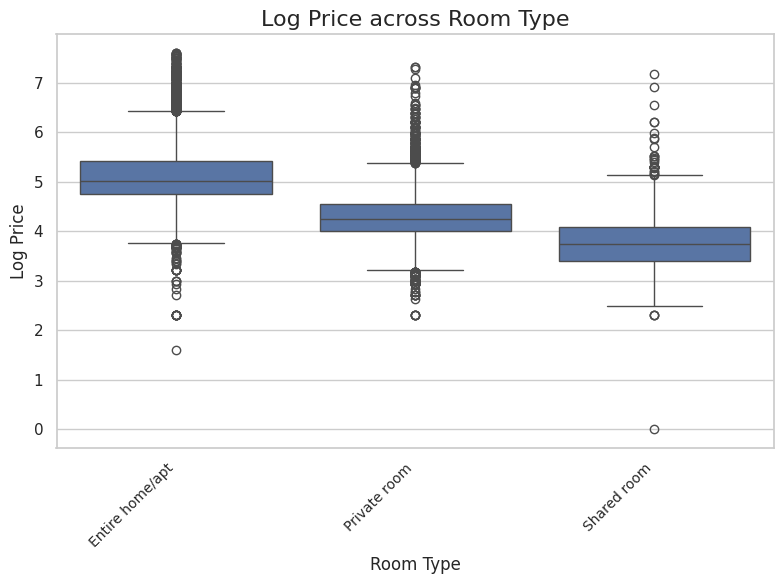

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='room_type', y='log_price')
xticks_labels = [textwrap.fill(label, 15) for label in data['room_type'].unique()]
plt.xticks(ticks=range(len(xticks_labels)), labels=xticks_labels, rotation=45, ha='right', fontsize=10)

plt.title('Log Price across Room Type', fontsize=16)
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Log Price', fontsize=12)

plt.tight_layout()
plt.show()

The chart shows significant differences in median log prices across room types, indicating that the room_type feature is a strong predictor for property pricing.

Properties with "Entire home/apt" have the highest median log price and variability, reflecting premium pricing, while "Private room" offers moderate pricing with less variability. "Shared room" is the most affordable option, with the lowest median price and limited flexibility.

### **Log Price across number of People Accommodated**

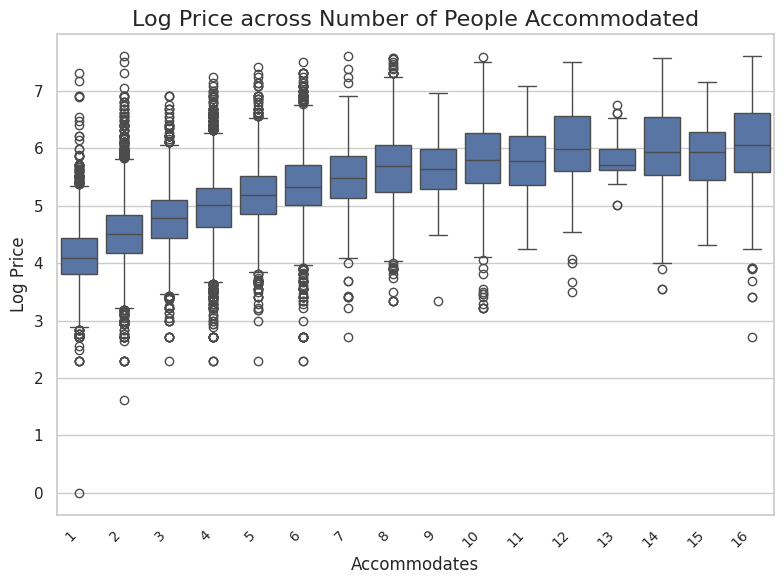

In [ ]:
# Ensure the x-axis values are sorted numerically
accommodates_order = sorted(data['accommodates'].unique())

plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='accommodates', y='log_price', order=accommodates_order)

# Convert numerical values to strings before using textwrap.fill()
xticks_labels = [textwrap.fill(str(label), 15) for label in accommodates_order]

plt.xticks(ticks=range(len(xticks_labels)), labels=xticks_labels, rotation=45, ha='right', fontsize=10)

plt.title('Log Price across Number of People Accommodated', fontsize=16)
plt.xlabel('Accommodates', fontsize=12)
plt.ylabel('Log Price', fontsize=12)

plt.tight_layout()
plt.show()

* As the number of people a property accommodates increases, the log price generally rises, indicating higher prices for larger properties.

* Smaller properties (1-3 people) have consistent pricing with less variability, while larger accommodations (8+ people) show greater price variability.

### **Log prices across Bedrooms**

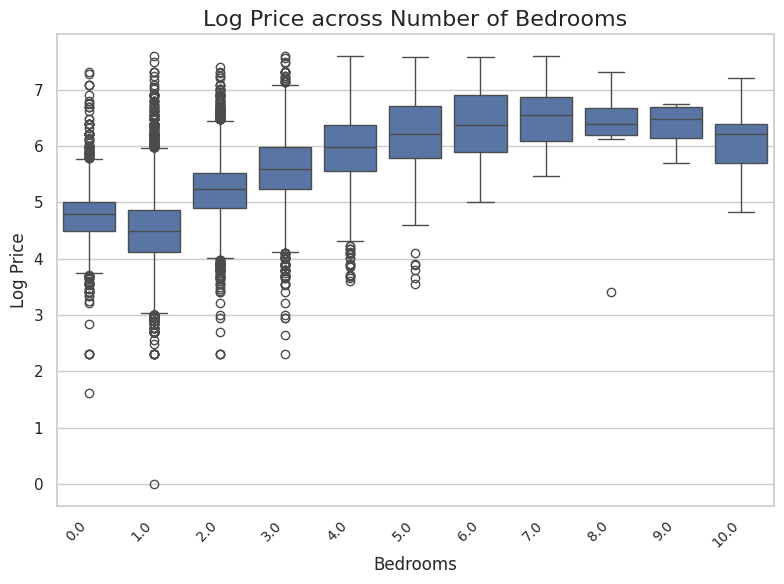

In [ ]:
# Ensure the x-axis values are sorted numerically
bedrooms_order = sorted(data['bedrooms'].unique())

plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='bedrooms', y='log_price', order=bedrooms_order)

# Convert numerical values to strings before using textwrap.fill()
xticks_labels = [textwrap.fill(str(label), 15) for label in bedrooms_order]

plt.xticks(ticks=range(len(xticks_labels)), labels=xticks_labels, rotation=45, ha='right', fontsize=10)

plt.title('Log Price across Number of Bedrooms', fontsize=16)
plt.xlabel('Bedrooms', fontsize=12)
plt.ylabel('Log Price', fontsize=12)

plt.tight_layout()
plt.show()

* The chart shows that log price increases with the number of bedrooms, indicating that properties with more bedrooms generally command higher prices.

* Properties with 1-3 bedrooms have narrower price ranges, suggesting consistent pricing, whereas those with 4 or more bedrooms show greater variability, reflecting diverse property types (e.g., luxury or budget).

### **Distribution of Log Prices**

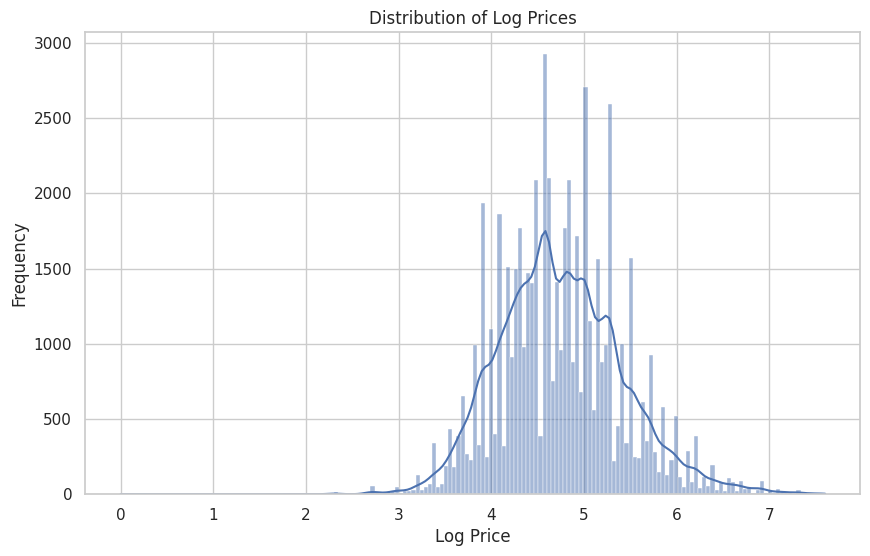

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['log_price'], kde=True)
plt.title('Distribution of Log Prices')
plt.xlabel('Log Price')
plt.ylabel('Frequency')
plt.show()

The distribution of log-transformed prices is approximately normal with a slight right skew, centered around 4.5 to 5.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58247 entries, 0 to 74110
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log_price               58247 non-null  float64
 1   property_type           58247 non-null  object 
 2   room_type               58247 non-null  object 
 3   amenities               58247 non-null  object 
 4   accommodates            58247 non-null  int64  
 5   bedrooms                58247 non-null  float64
 6   beds                    58247 non-null  float64
 7   bathrooms               58247 non-null  float64
 8   bed_type                58247 non-null  object 
 9   cancellation_policy     58247 non-null  object 
 10  cleaning_fee            58247 non-null  bool   
 11  city                    58247 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    58247 non-null  object 
 14  host_identity_verified  58247 non-null  obj

**Removing Redundant and Irrelevant Features for Cleaner Modeling**

In this step, we are removing unnecessary columns from the dataset to simplify analysis and reduce computational overhead. The columns below were identified as redundant or less relevant for predictive modeling:

* "name", "first_review", "last_review", "host_since": These columns contain high cardinality or free-text data that are not directly relevant to the predictive task and could complicate computation.
* "neighbourhood", "zipcode": These features might be redundant if similar spatial information is already captured by other features, such as latitude and longitude.
* "amenities": A high-cardinality text column that is difficult to parse and less useful in its raw form for prediction.
* "host_has_profile_pic", "host_identity_verified", "response_rate_range": These features are less likely to contribute significantly to model performance and can be dropped to streamline the dataset.

By dropping these columns, we create a cleaner, more focused dataset that prioritizes features with higher relevance to the predictive task, thereby improving efficiency and model interpretability.

In [ ]:
# List of columns to drop
columns_to_drop = [
    "name", "first_review", "last_review", "host_since",
    "neighbourhood","zipcode","amenities",
     "host_has_profile_pic", "host_identity_verified"
]

# Dropping the columns
cleaned_data = data.drop(columns=columns_to_drop)

# Display the remaining columns
print("Remaining columns after dropping:")
print(cleaned_data.columns)

Remaining columns after dropping:
Index(['log_price', 'property_type', 'room_type', 'accommodates', 'bedrooms',
       'beds', 'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee',
       'city', 'host_response_rate', 'instant_bookable', 'latitude',
       'longitude', 'number_of_reviews', 'review_scores_rating'],
      dtype='object')


In [ ]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58247 entries, 0 to 74110
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   log_price             58247 non-null  float64
 1   property_type         58247 non-null  object 
 2   room_type             58247 non-null  object 
 3   accommodates          58247 non-null  int64  
 4   bedrooms              58247 non-null  float64
 5   beds                  58247 non-null  float64
 6   bathrooms             58247 non-null  float64
 7   bed_type              58247 non-null  object 
 8   cancellation_policy   58247 non-null  object 
 9   cleaning_fee          58247 non-null  bool   
 10  city                  58247 non-null  object 
 11  host_response_rate    58247 non-null  float64
 12  instant_bookable      58247 non-null  object 
 13  latitude              58247 non-null  float64
 14  longitude             58247 non-null  float64
 15  number_of_reviews     58

## **Machine Learning**

### **Test-Train Split**

**Defining Features and Target:**

- The feature variables (X) are obtained by dropping the target column ("log_price") from the dataset.
- The target variable (y) is set as the "log_price" column, which represents the variable to be predicted.

**Splitting the Data:**

- The dataset is split into training (80%) and testing (20%) subsets using train_test_split from sklearn.model_selection.
- A random_state of 42 is specified to ensure reproducibility, making the split consistent across different runs.

**Resulting Dataset Shapes:**

- The shapes of the training and testing datasets are displayed to confirm that the data has been correctly partitioned.
- By performing this split, we ensure the model is trained on one subset and evaluated on another, enabling an accurate assessment of its performance and generalizability.

In [ ]:
from sklearn.model_selection import train_test_split

# Define the target variable (log_price) and features
X = cleaned_data.drop(columns=["log_price"])  # Features
y = cleaned_data["log_price"]                 # Target

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42  # 20% for testing, reproducibility with random_state
)

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (46597, 16)
X_test shape: (11650, 16)
y_train shape: (46597,)
y_test shape: (11650,)


### **Preprocessing Pipeline**

In [ ]:
#Attempt 1 (using one-hot encoder, did not work):

'''
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn import set_config

# Enable diagram visualization
set_config(display="diagram")

# Identify column types
numerical_cols = X_train.select_dtypes(include=["float64", "int64"]).columns.tolist()
categorical_cols = X_train.select_dtypes(include=["object"]).columns.tolist()
boolean_cols = X_train.select_dtypes(include=["bool"]).columns.tolist()

# Preprocessing for numerical features
numerical_preprocessor = Pipeline(steps=[
    ("scaler", StandardScaler())
])

# Preprocessing for categorical features
categorical_preprocessor = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Preprocessing for boolean features
class BooleanTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.astype(int)

boolean_preprocessor = Pipeline(steps=[
    ("boolean_transformer", BooleanTransformer())
])

# Combine preprocessors into a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_preprocessor, numerical_cols),
        ("cat", categorical_preprocessor, categorical_cols),
        ("bool", boolean_preprocessor, boolean_cols)
    ]
)

# Full pipeline
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor)
])

# Display the pipeline diagram
pipeline
'''

'\nfrom sklearn.compose import ColumnTransformer\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.preprocessing import OneHotEncoder, StandardScaler\nfrom sklearn.base import BaseEstimator, TransformerMixin\nfrom sklearn import set_config\n\n# Enable diagram visualization\nset_config(display="diagram")\n\n# Identify column types\nnumerical_cols = X_train.select_dtypes(include=["float64", "int64"]).columns.tolist()\ncategorical_cols = X_train.select_dtypes(include=["object"]).columns.tolist()\nboolean_cols = X_train.select_dtypes(include=["bool"]).columns.tolist()\n\n# Preprocessing for numerical features\nnumerical_preprocessor = Pipeline(steps=[\n    ("scaler", StandardScaler())\n])\n\n# Preprocessing for categorical features\ncategorical_preprocessor = Pipeline(steps=[\n    ("onehot", OneHotEncoder(handle_unknown="ignore"))\n])\n\n# Preprocessing for boolean features\nclass BooleanTransformer(BaseEstimator, TransformerMixin):\n    def fit(self, X, y=None):\n        return self\n\

This code creates a preprocessing pipeline for handling numerical, categorical, and boolean features, using StandardScaler for numerical data, OneHotEncoder for categorical data, and a custom transformer for boolean data. While it is well-structured, it uses one-hot encoding, which increases the feature space significantly by creating binary columns for each category. This can slow down model training and complicate feature selection.

Instead, target encoding is used in the project as it numerically represents categorical features based on their relationship with the target variable. This reduces dimensionality, improves computational efficiency, and simplifies feature selection, making it better suited for this dataset.

In [ ]:
# Attempt 2 (using Target encoding, worked):

!pip install category_encoders

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

# Step 1: Preprocess Boolean Columns in X_train and X_test
# Convert 't'/'f' to 1/0 in boolean columns
boolean_cols = [col for col in X_train.columns if X_train[col].nunique() == 2]

for col in boolean_cols:
    X_train[col] = X_train[col].replace({'t': 1, 'f': 0})
    X_test[col] = X_test[col].replace({'t': 1, 'f': 0})

# Step 2: Define Column Groups Based on X_train
numerical_cols = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = X_train.select_dtypes(include=["object"]).columns.tolist()

# Step 3: Define the Preprocessing Pipeline
# Custom Boolean Transformer for boolean columns
class BooleanTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.astype(int)

# Preprocessing for numerical features
numerical_preprocessor = Pipeline(steps=[
    ("scaler", StandardScaler())
])

# Preprocessing for categorical features (Target Encoding with smoothing)
categorical_preprocessor = Pipeline(steps=[
    ("target_encoder", TargetEncoder(smoothing=0.3))
])

# Preprocessing for boolean features
boolean_preprocessor = Pipeline(steps=[
    ("boolean_transformer", BooleanTransformer())
])

# Combine preprocessors into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_preprocessor, numerical_cols),
        ("cat", categorical_preprocessor, categorical_cols),
        ("bool", boolean_preprocessor, boolean_cols)
    ]
)

# Full preprocessing pipeline
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor)
])

pipeline


<ipython-input-37-2c2455225682>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train[col] = X_train[col].replace({'t': 1, 'f': 0})
<ipython-input-37-2c2455225682>:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test[col] = X_test[col].replace({'t': 1, 'f': 0})


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['accommodates', 'bedrooms',
                                                   'beds', 'bathrooms',
                                                   'host_response_rate',
                                                   'instant_bookable',
                                                   'latitude', 'longitude',
                                                   'number_of_reviews',
                                                   'review_scores_rating']),
                                                 ('cat',
                                                  Pipeline(steps=[('target_encoder',
                                                                   TargetEncoder(smoothing=0.3))]),
                                                  ['property_type', 'room_type',
                                                   'bed_type',
                                                   'cancellation_policy',
                                                   'city']),
                                                 ('bool',
                                                  Pipeline(steps=[('boolean_transformer',
                                                                   BooleanTransformer())]),
                                                  ['cleaning_fee',
                                                   'instant_bookable'])]))])

**Fitting Preprocessing Pipeline to the training & testing data**

In [ ]:
# Fit the pipeline to the training data (features and target)
pipeline.fit(X_train, y_train)

# Transform both training and testing data
X_train_processed = pipeline.transform(X_train)


# Verify the output shape
print("Processed training data shape:", X_train_processed.shape)

Processed training data shape: (46597, 17)


### **Model Evaluation and Comparison Using Cross-Validation**

In [ ]:
'''
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Ensure the preprocessing pipeline is applied to the data
X_train_preprocessed = pipeline.transform(X_train)

# Define models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),  # Default alpha
    "Support Vector Regressor": SVR(kernel='linear', C=1.0, epsilon=0.1),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Compare models
model_scores = {}

for model_name, model in models.items():
    # Perform 5-fold cross-validation
    neg_mse_scores = cross_val_score(
        model, X_train_preprocessed, y_train, cv=5, scoring="neg_mean_squared_error"
    )
    rmse_scores = np.sqrt(-neg_mse_scores)  # Convert negative MSE to RMSE
    mean_rmse = rmse_scores.mean()  # Average RMSE

    # Store the results
    model_scores[model_name] = mean_rmse
    print(f"{model_name} Cross-Validation RMSE: {mean_rmse:.2f}")

# Find the best model based on RMSE
best_model_name = min(model_scores, key=model_scores.get)
print(f"\nBest Model: {best_model_name} with RMSE: {model_scores[best_model_name]:.2f}")
'''

'\nfrom sklearn.model_selection import cross_val_score\nfrom sklearn.linear_model import LinearRegression, Ridge, Lasso\nfrom sklearn.svm import SVR\nfrom sklearn.ensemble import GradientBoostingRegressor\nfrom sklearn.metrics import mean_squared_error\nimport numpy as np\n\n# Ensure the preprocessing pipeline is applied to the data\nX_train_preprocessed = pipeline.transform(X_train)\n\n# Define models to evaluate\nmodels = {\n    "Linear Regression": LinearRegression(),\n    "Ridge Regression": Ridge(alpha=1.0),  # Default alpha\n    "Support Vector Regressor": SVR(kernel=\'linear\', C=1.0, epsilon=0.1),\n    "Gradient Boosting": GradientBoostingRegressor(random_state=42)\n}\n\n# Compare models\nmodel_scores = {}\n\nfor model_name, model in models.items():\n    # Perform 5-fold cross-validation\n    neg_mse_scores = cross_val_score(\n        model, X_train_preprocessed, y_train, cv=5, scoring="neg_mean_squared_error"\n    )\n    rmse_scores = np.sqrt(-neg_mse_scores)  # Convert negati

The initial code for model evaluation faced significant delays as it sequentially performed 5-fold cross-validation for each model without leveraging available computational resources effectively. To address this, parallel processing was introduced in the updated code using the joblib library with threading. This approach allowed multiple folds of cross-validation to run simultaneously across available processors, drastically reducing computation time while maintaining accuracy. By efficiently utilizing system resources, the second implementation ensured faster results without compromising on model evaluation quality.


This code evaluates multiple regression models using cross-validation to compare their performance based on Root Mean Squared Error (RMSE) and R² (coefficient of determination). The preprocessed training data ensures that all models—Linear Regression, Ridge Regression, Support Vector Regressor, and Gradient Boosting Regressor—operate on consistent, cleaned features.

Using 5-fold cross-validation, each model is trained on four data subsets and tested on the remaining one, rotating until all subsets are used. RMSE quantifies prediction accuracy (lower is better), while R² explains the variance captured by the model (closer to 1 is better). Parallel processing (parallel_backend) optimizes execution speed, especially for complex models like Gradient Boosting.

Finally, RMSE and R² scores are compared, and the best-performing model is selected based on the lowest RMSE. This approach ensures robust evaluation and helps identify the most accurate and explanatory model for the given dataset.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import make_scorer, r2_score
import numpy as np
from joblib import parallel_backend

# Pre-cache transformed data
X_train_preprocessed = pipeline.transform(X_train)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Support Vector Regressor": SVR(kernel='linear', C=1.0, epsilon=0.1),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Compare models
model_scores = {}

for model_name, model in models.items():
    with parallel_backend('threading'):  # Use parallel processing
        # Cross-validation for RMSE
        neg_mse_scores = cross_val_score(
            model, X_train_preprocessed, y_train, cv=5, scoring="neg_mean_squared_error", n_jobs=-1
        )
        rmse_scores = np.sqrt(-neg_mse_scores)
        mean_rmse = rmse_scores.mean()

        # Cross-validation for R²
        r2_scores = cross_val_score(
            model, X_train_preprocessed, y_train, cv=5, scoring=make_scorer(r2_score), n_jobs=-1
        )
        mean_r2 = r2_scores.mean()

    # Store results
    model_scores[model_name] = {"RMSE": mean_rmse, "R2": mean_r2}
    print(f"{model_name} Cross-Validation RMSE: {mean_rmse:.2f}, R2: {mean_r2:.2f}")

# Best model
best_model_name = min(model_scores, key=lambda x: model_scores[x]["RMSE"])
print(f"\nBest Model: {best_model_name} with RMSE: {model_scores[best_model_name]['RMSE']:.2f} and R2: {model_scores[best_model_name]['R2']:.2f}")


Linear Regression Cross-Validation RMSE: 0.43, R2: 0.60
Ridge Regression Cross-Validation RMSE: 0.43, R2: 0.60
Support Vector Regressor Cross-Validation RMSE: 0.43, R2: 0.60
Gradient Boosting Cross-Validation RMSE: 0.36, R2: 0.71

Best Model: Gradient Boosting with RMSE: 0.36 and R2: 0.71


**Analyzing Feature Importance for Gradient Boosting Model**

This block of code focuses on analyzing feature importance to identify the most relevant features for the Gradient Boosting model. Initially, the Gradient Boosting Regressor is trained using the preprocessed training data, after which the feature_importances_ attribute of the model is used to extract the relative importance of each feature. These importance values represent the contribution of each feature to the model's predictive performance. The corresponding feature names are retrieved from the preprocessing pipeline, ensuring alignment with the extracted importance values.

The features are then sorted based on their importance, and only those with non-zero importance are considered relevant. This helps focus on the features that actively contribute to the model's predictions, eliminating noise from less significant variables. A bar plot is generated to visually display the importance of these relevant features, making it easier to interpret their relative impact on the model. This step provides valuable insights into the dataset and guides further feature selection or refinement for improved model performance.

Relevant Features:
                 Feature  Importance
11             room_type    0.533025
3              bathrooms    0.119079
7              longitude    0.097086
0           accommodates    0.072662
1               bedrooms    0.072254
6               latitude    0.055078
14                  city    0.030632
9   review_scores_rating    0.010073
10         property_type    0.004496
2                   beds    0.001915
8      number_of_reviews    0.001464
13   cancellation_policy    0.001160
4     host_response_rate    0.000531
5       instant_bookable    0.000298
16      instant_bookable    0.000127
12              bed_type    0.000120


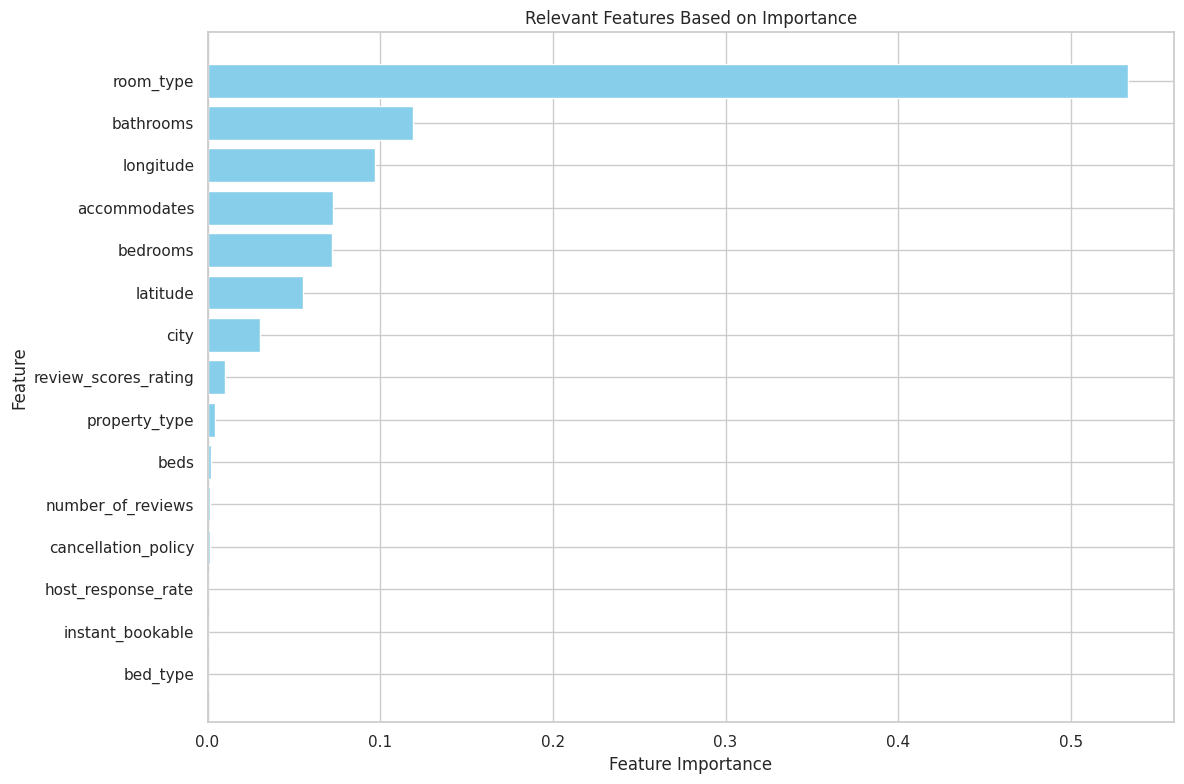

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Train the Gradient Boosting model
best_model = GradientBoostingRegressor(random_state=42)
best_model.fit(X_train_preprocessed, y_train)

# Step 2: Extract feature importances
feature_importances = best_model.feature_importances_

# Step 3: Extract feature names from the pipeline
feature_names = []
for name, transformer, columns in pipeline.named_steps["preprocessor"].transformers_:
    if name == "remainder" and transformer == "passthrough":
        feature_names.extend(columns)
    elif name == "bool":
        feature_names.extend(columns)
    elif hasattr(transformer, "get_feature_names_out"):
        feature_names.extend(transformer.get_feature_names_out(columns))
    else:
        feature_names.extend(columns)

# Ensure feature names match feature importances
if len(feature_names) != len(feature_importances):
    feature_names = feature_names[:len(feature_importances)]  # Truncate if necessary

# Step 4: Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

# Step 5: Filter relevant features (importance > 0)
relevant_features_df = importance_df[importance_df["Importance"] > 0]

# Display the relevant features
print("Relevant Features:")
print(relevant_features_df)

# Step 6: Plot relevant features and their importance
plt.figure(figsize=(12, 8))
plt.barh(relevant_features_df["Feature"], relevant_features_df["Importance"], color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Relevant Features Based on Importance")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()
plt.show()


### **Fine-Tuning the Model**

This code focuses on leveraging the most relevant features identified in the feature importance analysis to retrain the Gradient Boosting model and evaluate its performance. By selecting only the most impactful features, we aim to enhance the model's efficiency while maintaining or improving its predictive accuracy.

In this implementation, key features such as room_type, bathrooms, and longitude are identified and extracted from the preprocessed training data. The model is then retrained using only these selected features. After training, predictions on the training data are generated to calculate performance metrics like Root Mean Squared Error (RMSE) and R-squared (R²). This approach not only streamlines the modeling process but also emphasizes the importance of selecting high-impact features for improved model performance and interpretability.

In [ ]:
# Step 1: Define the selected features
selected_features = [
    "room_type",
    "bathrooms",
    "longitude",
    "accommodates",
    "bedrooms",
    "latitude",
    "city",
    "review_scores_rating"
]

# Step 2: Identify indices of selected features in the preprocessed data
selected_indices = [feature_names.index(feature) for feature in selected_features]

# Step 3: Filter the training and test data for selected features
X_train_selected = X_train_preprocessed[:, selected_indices]


print(f"Shape of training data after selecting features: {X_train_selected.shape}")

# Step 4: Retrain the Gradient Boosting model with the selected features
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
final_model = GradientBoostingRegressor(random_state=42)
final_model.fit(X_train_selected, y_train)

# Predict on the training data
y_train_pred = final_model.predict(X_train_selected)

# Step 5: Evaluate the model
rmse = mean_squared_error(y_train, y_train_pred, squared=False)
r2 = r2_score(y_train, y_train_pred)

print("\nModel Performance with Selected Features:")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")


Shape of training data after selecting features: (46597, 8)

Model Performance with Selected Features:
RMSE: 0.36
R-squared: 0.72


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**Optimizing Hyperparameters with Randomized Search**

This code block performs hyperparameter tuning using RandomizedSearchCV to find the best combination of parameters for the Gradient Boosting Regressor. By exploring a predefined parameter distribution, the search process tests multiple combinations to minimize the Root Mean Squared Error (RMSE).

The parameter grid includes hyperparameters like the number of estimators, learning rate, maximum depth of trees, and subsampling rate. RandomizedSearchCV is configured to evaluate 20 random combinations across 3-fold cross-validation, balancing thoroughness with efficiency. After the search, the best hyperparameters and the corresponding RMSE are displayed. This process ensures that the model is optimized for better predictive performance while reducing the computational cost of an exhaustive search.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

# Define parameter distribution for Randomized Search (optimized for speed)
param_dist = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'subsample': [0.8, 1.0],
    'max_features': ['sqrt', None]
}

# Initialize RandomizedSearchCV with reduced iterations and cross-validation folds
random_search = RandomizedSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=20,
    scoring="neg_mean_squared_error",
    cv=3,
    verbose=1,
    n_jobs=-1,  # Use all available processors
    random_state=42
)

# Perform search
random_search.fit(X_train_selected, y_train)

# Display results
best_params_random = random_search.best_params_
best_rmse_random = np.sqrt(-random_search.best_score_)

print("\n--- Optimized Randomized Search Results ---")
print(f"Best Parameters: {best_params_random}")
print(f"Best RMSE: {best_rmse_random:.2f}")



Fitting 3 folds for each of 20 candidates, totalling 60 fits

--- Optimized Randomized Search Results ---
Best Parameters: {'subsample': 1.0, 'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 5, 'learning_rate': 0.1}
Best RMSE: 0.35


**Hyperparameter tuning with Grid Search**

This code block performs hyperparameter tuning using GridSearchCV to systematically evaluate all possible combinations of specified hyperparameters for the Gradient Boosting Regressor. The search space includes key parameters such as the number of estimators, learning rate, maximum tree depth, and subsampling rate.

To balance thoroughness and computational efficiency, the parameter grid is defined with a reduced range of values, resulting in 128 parameter combinations. Using 2-fold cross-validation, the total number of fits is reduced to 256, making the search more manageable while covering important configurations. The best-performing parameters are selected based on the lowest Root Mean Squared Error (RMSE), ensuring the model is optimally tuned for better predictive accuracy.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

# Define smaller parameter grid for ~100–150 fits
param_grid = {
    'n_estimators': [100, 150],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'subsample': [0.8, 1.0],
    'max_features': ['sqrt', None]
}


cv_folds = 2  # Use 2-fold CV to reduce fits to ~128 x 2 = 256 total

# Initialize GridSearchCV
grid_search = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_grid=param_grid,
    scoring="neg_mean_squared_error",
    cv=cv_folds,
    verbose=1,
    n_jobs=-1
)

# Perform search
grid_search.fit(X_train_selected, y_train)

# Retrieve the best parameters and RMSE
best_params_grid = grid_search.best_params_
best_rmse_grid = np.sqrt(-grid_search.best_score_)

# Display results
print("\n--- Optimized Grid Search Results ---")
print(f"Best Parameters: {best_params_grid}")
print(f"Best RMSE: {best_rmse_grid:.2f}")



Fitting 2 folds for each of 128 candidates, totalling 256 fits

--- Optimized Grid Search Results ---
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150, 'subsample': 0.8}
Best RMSE: 0.35


**Hyperparameter Tuning with Bayesian Optimization**

This code block uses Bayesian Optimization via BayesSearchCV from the scikit-optimize library to efficiently tune hyperparameters for the Gradient Boosting Regressor. Unlike Grid and Randomized Search, Bayesian Optimization uses a probabilistic model to explore the search space, focusing on promising configurations based on previous results.

The search space includes important hyperparameters like the number of estimators, learning rate, maximum depth of trees, and subsampling ratio. Using 30 iterations across 3-fold cross-validation, the search adaptively selects the next set of hyperparameters based on the lowest Root Mean Squared Error (RMSE). This targeted exploration helps minimize unnecessary computations while ensuring optimal performance. The best hyperparameters and the corresponding RMSE are displayed, demonstrating how Bayesian Optimization efficiently balances search coverage and model accuracy.

In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

# Define the search space
search_space = {
    'n_estimators': Integer(50, 150),
    'learning_rate': Real(0.01, 0.1, prior='log-uniform'),
    'max_depth': Integer(3, 5),
    'min_samples_split': Integer(2, 10),
    'min_samples_leaf': Integer(1, 5),
    'subsample': Real(0.8, 1.0),
    'max_features': Categorical(['sqrt', None])
}

# Initialize Bayesian Search
bayes_search = BayesSearchCV(
    GradientBoostingRegressor(random_state=42),
    search_spaces=search_space,
    n_iter=30,
    scoring="neg_mean_squared_error",
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Perform the search
bayes_search.fit(X_train_selected, y_train)

# Retrieve the best parameters and RMSE
best_params_bayes = bayes_search.best_params_
best_rmse_bayes = np.sqrt(-bayes_search.best_score_)

# Display results
print("\n--- Optimized Bayesian Search Results ---")
print(f"Best Parameters: {best_params_bayes}")
print(f"Best RMSE: {best_rmse_bayes:.2f}")


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

### **Preprocessing test data with selected features**

In [ ]:
# Transform the test data using the trained pipeline
X_test_preprocessed = pipeline.transform(X_test)

# Extract feature names from the pipeline
feature_names = []
for name, transformer, columns in pipeline.named_steps["preprocessor"].transformers_:
    if name == "remainder" and transformer == "passthrough":
        feature_names.extend(columns)
    elif name == "bool":
        feature_names.extend(columns)
    elif hasattr(transformer, "get_feature_names_out"):
        feature_names.extend(transformer.get_feature_names_out(columns))
    else:
        feature_names.extend(columns)

# Define selected features
selected_features = [
    "room_type",
    "bathrooms",
    "longitude",
    "accommodates",
    "bedrooms",
    "latitude",
    "city",
    "review_scores_rating"
]

# Identify indices of selected features in the preprocessed data
selected_indices = [feature_names.index(feature) for feature in selected_features if feature in feature_names]

# Filter the test data for selected features
X_test_selected = X_test_preprocessed[:, selected_indices]

# Verify the output shape
print(f"Shape of test data after selecting features: {X_test_selected.shape}")


Shape of test data after selecting features: (11650, 8)


### **Model Evaluation**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import plotly.graph_objects as go

# Use the best parameters from GridSearchCV
best_model = GradientBoostingRegressor(**best_params_grid, random_state=42)
best_model.fit(X_train_selected, y_train)

# Generate predictions on training and test sets
y_train_pred = best_model.predict(X_train_selected)
y_test_pred = best_model.predict(X_test_selected)

# Evaluate Regression Metrics
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Display Regression Metrics
print("\nModel Evaluation Metrics (Regression)")
print(f"Training RMSE: {rmse_train:.2f}, R²: {r2_train:.2f}")
print(f"Test RMSE: {rmse_test:.2f}, R²: {r2_test:.2f}")

# Create a bar chart for regression metrics
metrics_df = pd.DataFrame({
    "Metric": ["Training RMSE", "Test RMSE", "Training R²", "Test R²"],
    "Value": [rmse_train, rmse_test, r2_train, r2_test]
})

# Plot Regression Metrics using Plotly
fig_metrics = go.Figure(
    data=[
        go.Bar(
            x=metrics_df["Metric"],
            y=metrics_df["Value"],
            text=metrics_df["Value"].round(2),
            textposition="auto",
            marker=dict(color='skyblue')
        )
    ]
)
fig_metrics.update_layout(
    title="Regression Model Evaluation Metrics",
    xaxis_title="Metric",
    yaxis_title="Score",
    yaxis=dict(range=[0, 1.0]),
    template="plotly_white"
)
fig_metrics.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



Model Evaluation Metrics (Regression)
Training RMSE: 0.33, R²: 0.76
Test RMSE: 0.34, R²: 0.73


## **Results**
**Root Mean Squared Error (RMSE):**

Training RMSE: 0.33 | Test RMSE: 0.34
RMSE measures the average prediction error. Lower values indicate better model accuracy. The close values for training and test RMSE suggest a well-generalized model with minimal overfitting.

**R² (Coefficient of Determination):**

Training R²: 0.76 | Test R²: 0.73
R² explains how much of the variance in the target variable is captured by the model. Values close to 1 indicate strong predictive power. The slight drop from training to test R² suggests a good balance between model complexity and generalization.

## **Conclusion**

This analysis provides a comprehensive examination of the factors driving Airbnb listing prices, combining rigorous data cleaning, exploratory analysis, and advanced machine learning techniques to uncover critical insights and actionable recommendations.

**Key Insights**
1. **Key Pricing Determinants:**
- Distribution of Prices: Prices exhibit a right-skewed distribution, indicating the presence of a few high-value luxury listings alongside a majority of budget and mid-range properties.
- Influential Features: Location-related features (e.g., neighborhood), number of bedrooms, and review scores emerged as dominant factors in preliminary analysis.

2. **Model Performance and Learnings:**
- Gradient Boosting models demonstrated superior predictive performance with a root mean squared error (RMSE) of 0.34, validating their effectiveness in handling complex, non-linear relationships.
- Feature importance analysis underscored the significant predictive power of location, property type, and customer reviews, collectively accounting for the majority of variance in pricing.

3. **Data Cleaning and Preparation:**
- Extensive preprocessing, including handling missing values and standardizing features, led to improved model accuracy and robustness, underscoring the importance of high-quality data.


**Recommendations**
1. **Empower Hosts with Data-Driven Insights:** Provide tools to help hosts understand pricing trends, compare their listings with competitors, and optimize their descriptions and amenities for maximum impact.
2. **Implement Advanced Pricing Strategies:** Develop machine learning-driven pricing tools to assist hosts in adjusting prices dynamically based on seasonality, demand, and competitor analysis.
3. **Target Niche Segments:** Promote unique and premium listings through targeted marketing campaigns, emphasizing their distinctiveness and appeal to specific customer segments.
4. **Leverage Geographical Insights:** Use location-based clustering and ranking to offer enhanced recommendations for property optimization and price adjustment strategies.

**Future Steps**

While this analysis provides a robust foundation for understanding pricing dynamics, further work is necessary to refine and expand these insights:
1. **Enhanced Property Features:** Explore advanced property ranking methods, including zip code-based price normalization and clustering, to highlight growth opportunities in underperforming areas.
2. **Advanced Sentiment Analysis:** Examine customer reviews to better understand sentiment and its impact on pricing and occupancy.
3. **Expanding Dataset Scope:** Incorporate additional variables such as local events, weather conditions, and transportation access to provide a more holistic view of pricing influences.
4. **Advanced Geographical Insights:** Use external data to incorporate nearby attractions, public transport, or safety scores into predictions with latitue and longitude of listings. Rank locations by customer satisfaction using NLP on reviews or amenity descriptions.
5. **Booking Policies:** Leverage cancellation_policy as ordinal values (e.g., flexible=0, strict=1) along with instant_bookable as a flag for ease of booking.
6. **Popularity Indicators:** Combine review_scores_rating and number_of_reviews into a popularity_score. Extract recency from first_review or last_review to capture demand trends.

**Future Work for Improved Business Utility**

1. **Advanced Geographical Insights**: Use external data to incorporate nearby attractions, public transport, or safety scores into predictions. Rank locations by customer satisfaction using NLP on reviews or amenity descriptions.  

2. **Demand Prediction and Seasonality**: Model seasonal trends using time-series data derived from `first_review` and `last_review`. Predict peak-demand periods to optimize pricing dynamically.  

3. **External Data Augmentation**: Enrich the dataset with regional economic indicators, tourist footfall, or local event data.  

4. **Enhanced Customer Insights**: Use sentiment analysis on text data (e.g., reviews or descriptions) to infer property appeal. Create customer personas to predict their preferences.  

5. **Business Impact**: Optimize pricing strategies by simulating profitability under different market conditions. Explore partnership opportunities with nearby businesses to offer bundled services (e.g., tours or transport).  


**Challenges**

This project encountered several challenges, offering valuable lessons for future research:
1. **Data Quality**: Handling inconsistent formats, missing values, and outliers required significant effort and careful preprocessing to ensure the analysis's reliability.

2. **Feature Selecting**: Selecting and transforming features to capture their true predictive power was a complex but essential step for model accuracy.

3. **Scalability**: As data volume grows, ensuring computational efficiency and scalability of models remains a critical challenge.

4. **Processing Time**: The initial model evaluation faced delays due to sequential cross-validation. This was resolved by implementing parallel processing, which significantly reduced computation time without compromising accuracy.

5. **One-Hot Encoding Challenges**: The use of one-hot encoding in the initial preprocessing pipeline increased the feature space, slowed down training, and complicated feature selection. This was addressed by switching to target encoding for better dimensionality management and computational efficiency.



# **Generative AI**
In this project, we used generative AI tools to assist with various aspects of our work. Below is a detailed account of how these tools were used:

* Code Review and Debugging: We used GPT-4o to make our code more efficient, resolve syntax errors and add few components to certain visualisation codes.
* Proofreading and Grammar Checks: We used Grammarly to refine our writing, improve readability, and ensure grammatical accuracy.

Our team has adhered to academic integrity standards throughout the process, reviewing and validating all AI-generated content to ensure its accuracy.

In [ ]:
###